In [3]:
import numpy as np
import matplotlib.pyplot as plt
import torchvision
from sklearn.manifold import TSNE


transform = torchvision.transforms.Compose([
                    torchvision.transforms.ToTensor(),
                    torchvision.transforms.Normalize(0.5, 0.5)])

train_dataset = torchvision.datasets.MNIST(
    root="./MNIST/train", train=True,
    transform=transform,
    download=True)

test_dataset = torchvision.datasets.MNIST(
    root="./MNIST/test", train=False,
    transform=transform,
    download=True)

def encode_label(j):
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e

def calculate_bias(data):
    b = []
    for num in range(10):
        filtered_data = [x[0] for x in data if np.argmax(x[1]) == num]
        avg_dot = np.mean([np.dot(avg_digits[num].T, digit) for digit in filtered_data])
        b.append(avg_dot)
    return b

def shape_data(data):
    features = [np.reshape(x[0][0].numpy(), (784, 1)) / 255.0 for x in data]
    labels = [encode_label(y[1]) for y in data]
    return zip(features, labels)


def average_digit(data, digit):
    filtered_data = [x[0] for x in data if np.argmax(x[1]) == digit]
    filtered_array = np.asarray(filtered_data)
    return np.average(filtered_array, axis=0)


def classifier(digit, num):
    scores = [np.dot(avg_digits[i].T, digit) - b[i] for i in range(10)]
    predicted_class = np.argmax(scores)
    return predicted_class == num

def check_accuracy (dataset):
    correct = 0
    total = 0
    num_classes = 10

    true_positives = np.zeros(num_classes)
    false_positives = np.zeros(num_classes)
    false_negatives = np.zeros(num_classes)

    overall_tp = 0
    overall_fp = 0
    overall_fn = 0

    for data in dataset:
        digit, true_label = data

        predicted = model(digit)

        predicted_label = np.argmax(predicted)

        if predicted_label == np.argmax(true_label):
            correct += 1
        total += 1

        for i in range(num_classes):
            if predicted_label == i:
                if np.argmax(true_label) == i:
                    true_positives[i] += 1
                    overall_tp += 1
                else:
                    false_positives[i] += 1
                    overall_fp += 1
            elif np.argmax(true_label) == i:
                false_negatives[i] += 1
                overall_fn += 1

    accuracy = correct / total * 100
    print(f"Accuracy: {accuracy:.4f}%")

    for i in range(num_classes):
        precision = (
            true_positives[i] / (true_positives[i] + false_positives[i])
            if (true_positives[i] + false_positives[i]) > 0 else 0
        )
        recall = (
            true_positives[i] / (true_positives[i] + false_negatives[i])
            if (true_positives[i] + false_negatives[i]) > 0 else 0
        )
        print(f"Class {i} - Precision: {precision:.4f}, Recall: {recall:.4f}")

    overall_precision = overall_tp / (overall_tp + overall_fp) if (overall_tp + overall_fp) > 0 else 0
    overall_recall = overall_tp / (overall_tp + overall_fn) if (overall_tp + overall_fn) > 0 else 0

    print(f"Overall Precision: {overall_precision:.4f}")
    print(f"Overall Recall: {overall_recall:.4f}")

def model(digit):
    res = []
    for i in range(10):
        if classifier(digit, i):
            res += [1] + (9 - i) * [0]
            return res
        else:
            res.append(0)
    return res

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 136MB/s]


Extracting ./MNIST/train/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/train/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 25.5MB/s]

Extracting ./MNIST/train/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/train/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 38.5MB/s]

Extracting ./MNIST/train/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/train/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 3.81MB/s]

Extracting ./MNIST/train/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/train/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 152MB/s]

Extracting ./MNIST/test/MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 19.4MB/s]

Extracting ./MNIST/test/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 44.2MB/s]

Extracting ./MNIST/test/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/test/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 4.22MB/s]

Extracting ./MNIST/test/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/test/MNIST/raw



In [4]:
train = shape_data(train_dataset)
train = list(train)
test = shape_data(test_dataset)
test = list(test)

In [5]:
avg_digits = []
for i in range(10):
    t = average_digit(train, i)
    avg_digits.append(t)
b = calculate_bias(train)

In [6]:
check_accuracy(test)

Accuracy: 67.9200%
Class 0 - Precision: 0.8055, Recall: 0.9296
Class 1 - Precision: 1.0000, Recall: 0.0018
Class 2 - Precision: 0.4926, Recall: 0.8983
Class 3 - Precision: 0.8446, Recall: 0.7535
Class 4 - Precision: 0.8385, Recall: 0.7505
Class 5 - Precision: 0.3956, Recall: 0.8173
Class 6 - Precision: 0.9465, Recall: 0.7380
Class 7 - Precision: 0.9881, Recall: 0.6488
Class 8 - Precision: 0.5995, Recall: 0.7885
Class 9 - Precision: 0.8847, Recall: 0.5778
Overall Precision: 0.6792
Overall Recall: 0.6792


In [64]:
def visualize_with_tsne(X_test, y_test, num_samples=1000):
    # Filter finite samples
    X_test_clean = [x for x in X_test if np.isfinite(x).all()]
    y_test_clean = [y for i, y in enumerate(y_test) if np.isfinite(X_test[i]).all()]

    if len(X_test_clean) > num_samples:
        indices = np.random.choice(len(X_test_clean), num_samples, replace=False)
        X_test_clean = [X_test_clean[i] for i in indices]
        y_test_clean = [y_test_clean[i] for i in indices]

    labels = [np.argmax(y) for y in y_test_clean]

    # t-SNE on Raw Data
    tsne_raw = TSNE(n_components=2, random_state=42, perplexity=20)
    reduced_raw = tsne_raw.fit_transform(np.squeeze(X_test_clean))

    # t-SNE on Model Predictions
    logits_clean = [model(x) for x in X_test_clean]
    logits_array = np.array(logits_clean)
    tsne_model = TSNE(n_components=2, random_state=42, perplexity=20)
    reduced_logits = tsne_model.fit_transform(logits_array)

    # Plot side-by-side
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    scatter1 = ax[0].scatter(reduced_raw[:, 0], reduced_raw[:, 1], c=labels, cmap="tab10", alpha=0.3)
    ax[0].set_title("Samples from Training Data")

    scatter2 = ax[1].scatter(reduced_logits[:, 0], reduced_logits[:, 1], c=labels, cmap="tab10", alpha=0.3)
    ax[1].set_title("Results on Training Data")

    plt.tight_layout()
    plt.show()

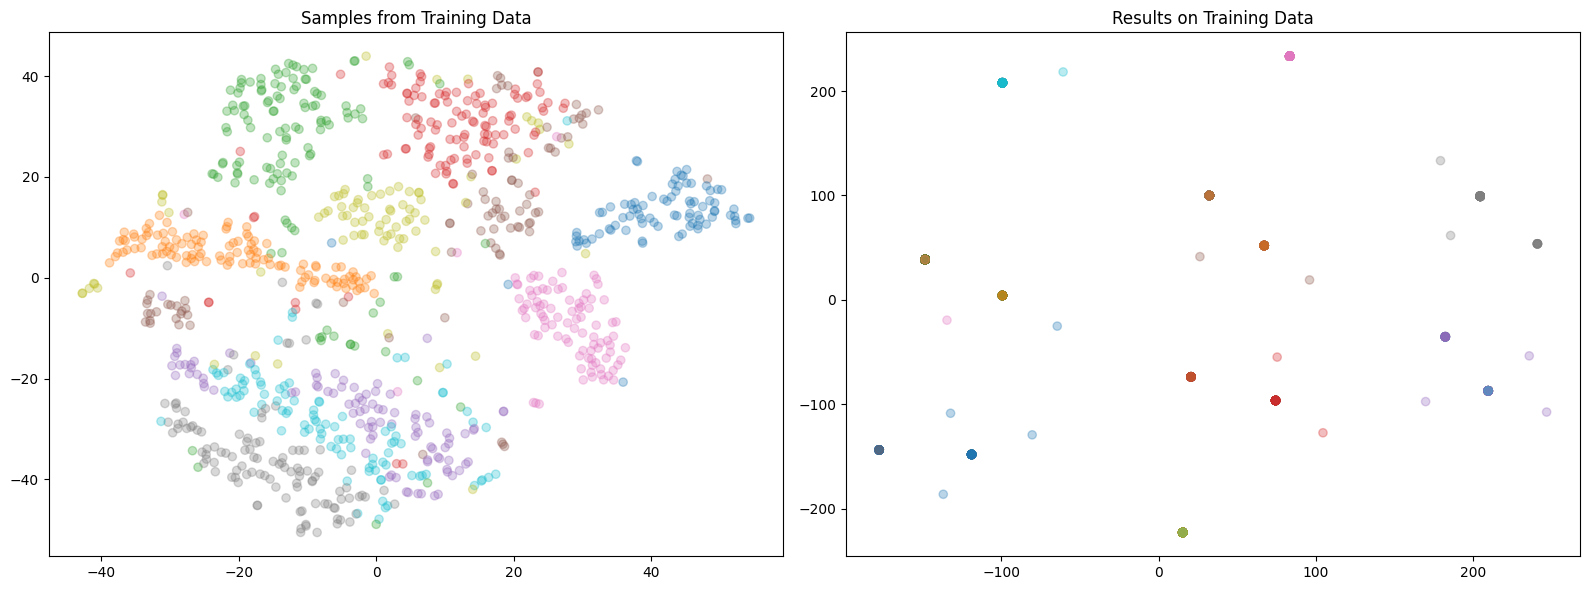

In [65]:
features = [pair[0] for pair in train]
labels = [pair[1] for pair in train]

avg_digits = np.squeeze(avg_digits)

visualize_with_tsne (features, labels)

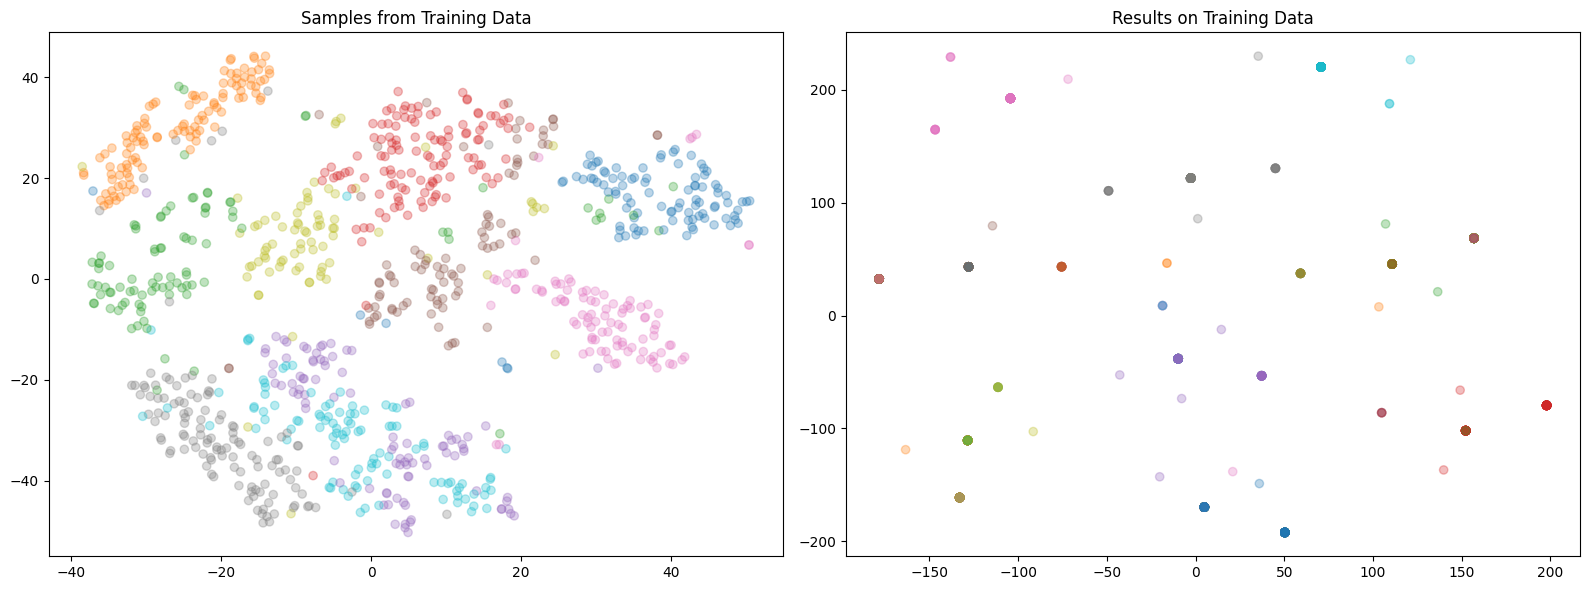

In [66]:
features = [pair[0] for pair in test]
labels = [pair[1] for pair in test]

visualize_with_tsne (features, labels)